# Assignment 2: Route Finder Using Bi-Directional BFS/DFS

**Objective**: Use Bi-directional BFS/DFS to solve a navigation problem

**Problem Statement**: Represent a City Map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.

**Tasks**:
- Implement Bi-directional BFS to minimize the number of nodes explored.
- Compare the performance of Bi-directional BFS with standard BFS and DFS.
- Visualize the search process (e.g., using a library like networkx in Python).

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

In [41]:
def create_graph():
    return {}

In [42]:
def add_road(graph, source, dest):
    if source not in graph:
        graph[source] = []
    if dest not in graph:
        graph[dest] = []
    graph[source].append(dest)
    graph[dest].append(source)

In [43]:
def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]
    
    forward_queue = deque([[start]])
    backward_queue = deque([[goal]])
    forward_visited = {start}
    backward_visited = {goal}
    
    while forward_queue and backward_queue:
        # Forward BFS
        path = forward_queue.popleft()
        node = path[-1]
        
        for neighbor in graph[node]:
            if neighbor in backward_visited:
                for backward_path in backward_queue:
                    if backward_path[-1] == neighbor:
                        return path + backward_path[-2::-1]
            if neighbor not in forward_visited:
                forward_visited.add(neighbor)
                forward_queue.append(path + [neighbor])
        
        # Backward BFS
        path = backward_queue.popleft()
        node = path[-1]
        
        for neighbor in graph[node]:
            if neighbor in forward_visited:
                for forward_path in forward_queue:
                    if forward_path[-1] == neighbor:
                        return forward_path + path[-2::-1]
            if neighbor not in backward_visited:
                backward_visited.add(neighbor)
                backward_queue.append(path + [neighbor])
    
    return None

In [44]:
def standard_bfs(graph, start, goal):
    queue = deque([[start]])
    visited = {start}
    
    while queue:
        path = queue.popleft()
        node = path[-1]
        
        if node == goal:
            return path
            
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(path + [neighbor])
    return None

In [45]:
def dfs(graph, start, goal, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = [start]
        
    if start == goal:
        return path
        
    visited.add(start)
    
    for neighbor in graph[start]:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, goal, visited, path + [neighbor])
            if new_path:
                return new_path
    return None

In [46]:
def visualize_path(graph, path, title):
    plt.clf()
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    path_edges = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, 
                         edge_color='r', width=2, ax=ax)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

In [47]:
# Create sample city map
graph = create_graph()

# Add roads (edges)
roads = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('A', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'E'),
    ('B', 'G'), ('C', 'H'), ('F', 'C')
]

for source, dest in roads:
    add_road(graph, source, dest)



Bi-directional BFS:
Path: A -> B -> C -> E
Time taken: 0.00 ms


<Figure size 640x480 with 0 Axes>

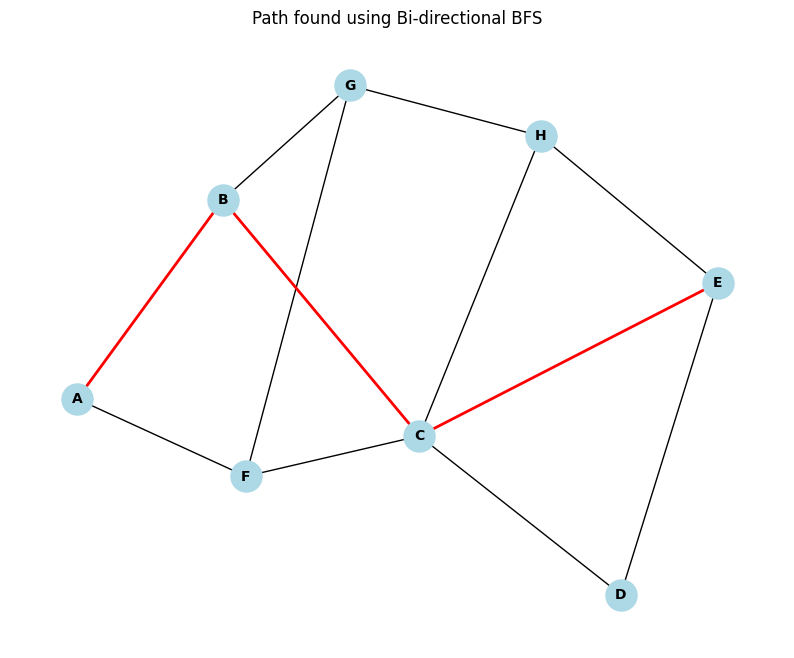


Standard BFS:
Path: A -> B -> C -> D -> E
Time taken: 0.00 ms


<Figure size 640x480 with 0 Axes>

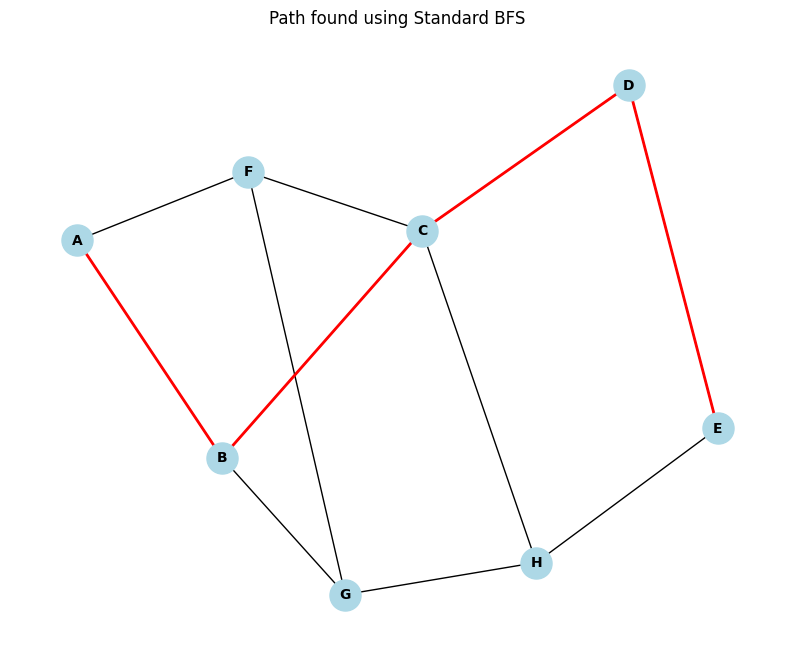


DFS:
Path: A -> B -> C -> D -> E
Time taken: 0.00 ms


<Figure size 640x480 with 0 Axes>

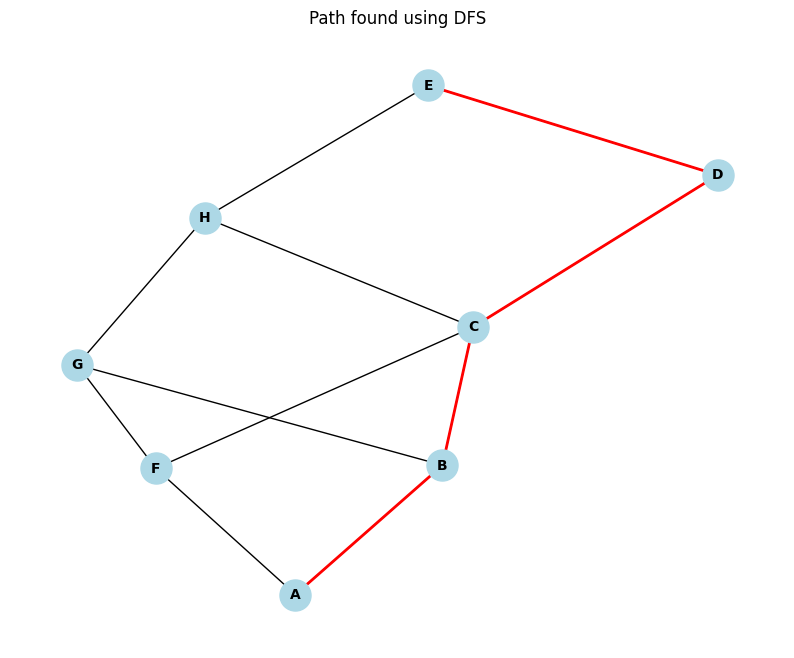

In [48]:

start, goal = 'A', 'E'

# Compare algorithms
algorithms = [
    (lambda s, g: bidirectional_bfs(graph, s, g), "Bi-directional BFS"),
    (lambda s, g: standard_bfs(graph, s, g), "Standard BFS"),
    (lambda s, g: dfs(graph, s, g), "DFS")
]

for algo, name in algorithms:
    start_time = time.time()
    path = algo(start, goal)
    end_time = time.time()
    
    print(f"\n{name}:")
    print(f"Path: {' -> '.join(path)}")
    print(f"Time taken: {(end_time - start_time)*1000:.2f} ms")
    
    visualize_path(graph, path, f"Path found using {name}")